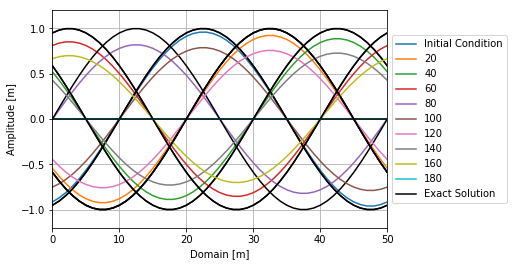

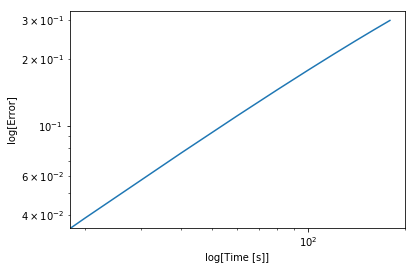

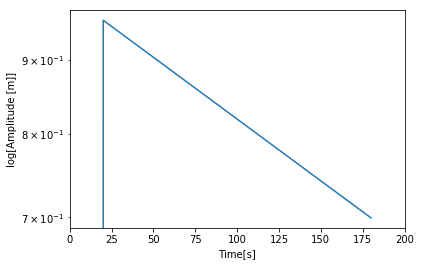

In [8]:
#1 Experiment

from numpy import math
import numpy as np


get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import math
np.core
#DECLARING CONSTANTS:

#*****************************************#
#Declare CONSTANTS:


#*****************************************#
#play around with these constants and see what happens!
timeInterval = 20  #Time Interval Between saving = 20
Ttot = 200.0
TStepSize = 1.0
Nt = int(Ttot/TStepSize) #total number of time steps 
C = 0.5 #initial velocity 
A = 1.0 #initial amplitude

#depends on which Courant Number (see below, a function of velocity, time step and space step.) you choose,
#wave amplitude either blows up or decays to zero or remains unchanged. 
#*****************************************#

TStartingStep = 0 #Starting Time Step 
 

Xtot = 50 #total distance
XStepSize = 1 
Nx = int(Xtot/XStepSize + 1)  #total number of grid sizes = 51

XStartingStep = 0 #Starting Grid Step

#!!! 51 grid points in 50m



Wavelength_int = 50.0 

pi = float(3.141592654)

CourantNum = C*TStepSize/XStepSize




#**************************************#
#Exact Solution:

def exactSolution(x,t):
    return (A*math.sin(2*pi*(x- C * t )/Wavelength_int))


#For Square Wave Problem
def sign (x):
    if (x < 0):
        return -1
    elif (x == 0):
        return 0
    elif (x > 0):
        return 1



#**************************************#
#variable array: 

u_old = np.zeros([Nx])
u_new = np.zeros([Nx])
u_exact = np.zeros([Nx])
#**************************************#
#initial conditions

#exact solution & numerical are the same!!!

for j in range(0,Nx):
    u_old[j] = (A*math.sin(2*pi*(XStepSize*j)/Wavelength_int))
    
for j in range(0,Nx):
    u_exact[j] = (A*math.sin(2*pi*(XStepSize*j)/Wavelength_int))

#**************************************#
#Saving arrays: 


u_OneTimeStep = np.zeros([int(Nt/timeInterval)  ,Nx],dtype=float)
u_exact_solution = np.zeros([int(Nt/timeInterval)  ,Nx], dtype=float)




u_Time_Final = np.zeros([Nt],dtype=float) #storing max amplitude at each time step 


errorList= []
timeList = []
ampList = []

#**************************************#
counter = 0
#putting initial conditions in the saving array:
u_OneTimeStep[0] = u_old
u_exact_solution[0] = u_exact

errorList += [0]
timeList += [0]
ampList += [0]
#*************************************#
#grid point array

grid = []
for i in range(0,Nx):
    grid+= [XStepSize*i]


#**************************************#


#main loop 


counter = 0


            #range --> first number inclusive, last number exclusive!!!

for k in range(1,Nt): #time loop
    CurrentTime = k*TStepSize
    
    for i in range(1, Nx-1): #grid loop
        u_new[i] = u_old[i] - CourantNum*(u_old[i] -u_old[i-1])

        
    #implement boundary conditions
    u_new[Nx-1] = u_old[Nx-1] - CourantNum*(u_old[Nx-1] - u_old[Nx-2])
    u_new[0] = u_new[Nx-1] #ORDER IMPORTANT #????????????# 
    
        
        
    #shifting:
        
    u_old = np.copy(u_new)
        
    #calculate exact solution:
    for a in range(0,Nx):
        u_exact[a] = exactSolution( a*XStepSize, CurrentTime)
        
    #calculate error:
    error = max(abs(u_exact[0:Nx]-u_old[0:Nx]))
    #print(u_old,[CurrentTime])
    
    #calculate amplitude:
    amp = max(abs(u_old[0:Nx]))
    
    if (k)%timeInterval == 0:
        u_OneTimeStep[counter] = u_old
        u_exact_solution[counter] = u_exact
        errorList += [((error))]
        timeList += [((CurrentTime))]
        ampList += [amp]
        counter+=1
        
#print((u_OneTimeStep))
#print(errorList)
#print(timeList)
#length of u_OneTimeStep = 10

#error plot
"""
plt.plot((timeList),(errorList))
plt.yscale('log')
plt.xscale('log')

"""



plt.figure(0)

#plt.plot(grid, u_OneTimeStep[0])

for i in range(0,len(u_OneTimeStep)):
    if i == 0:
        label = 'Initial Condition'
    else:
        label = (int(i*timeInterval*TStepSize))
        
        
        
    
    plt.plot(grid, u_OneTimeStep[i],label = label)
    plt.plot(grid, u_exact_solution[i], c = 'k')
plt.plot(grid, u_exact_solution[1], c = 'k',label = 'Exact Solution' )
#plt.plot(grid, u_exact_solution[0], c = 'k' )


"""   
plt.plot( timeList,ampList,)
plt.yscale('log')
plt.xscale('linear')
"""


    

#------
# These commands give the final adjustments to the figure
plt.grid()  # puts the grid in the figure
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5)) # place the legend in the right place
plt.xlabel('Domain [m]') # labels the x axis
plt.ylabel('Amplitude [m]') # labels the y axis
plt.xlim(0,50) # sets the limits of the x axis to show
plt.ylim(-1.2,1.2) # sets the limits of the y axis to show

plt.savefig('#1,Waveform.pdf', bbox_inches='tight') 

#Note that the bbox_extra_artists must be an iterable

#***************************************#
#error-time 
plt.figure(1)
plt.yscale('log')
plt.xscale('log')
plt.plot((timeList),(errorList))

plt.xlabel('log[Time [s]]')
plt.ylabel('log[Error]')
#plt.ylim(0,10**-9)
plt.xlim(0,200) 
plt.savefig('1.pdf', bbox_inches='tight') 


#****************************************#
plt.figure(2)
plt.yscale('log')
plt.xscale('linear')
plt.plot((timeList),(ampList))

plt.xlabel('Time[s]')
plt.ylabel('log[Amplitude [m]]')
plt.xlim(0,200)

plt.savefig('2.pdf', bbox_inches='tight') 



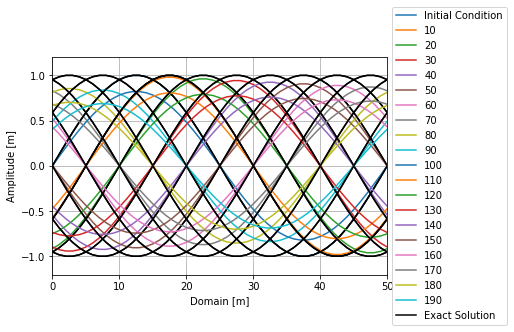

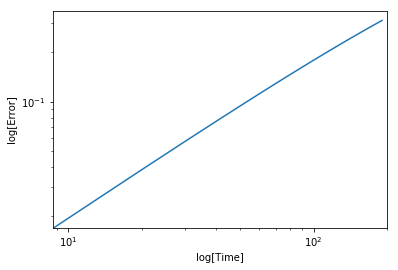

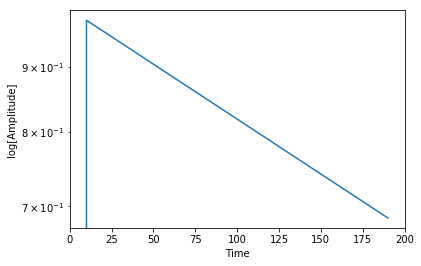

In [164]:
#2 Experiment:  shows loss of amplitude
ERROR1= []
AMP1= []



from numpy import math
import numpy as np

#DON'T COMPUTE CONDITIONS AT THE LAST TIMESTEP????


get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import math
np.core
#DECLARING CONSTANTS:

#*****************************************#
#Declare variables:

#CONSTANTS:

Ttot = 200.0
TStepSize = 1
Nt = int(Ttot/TStepSize) #total number of time steps (need to add 1?) 100

TStartingStep = 0 #Starting Time Step 
 


Xtot = 50 #total distance
XStepSize = 1 
Nx = int(Xtot/XStepSize + 1)  #total number of grid sizes = 51

XStartingStep = 0 #Starting Grid Step

#!!! 51 grid points in 50m

C = 0.5 #initial velocity 
A = 1.0 #initial amplitude

Wavelength_int = 50.0 #QUESTION: WAVELENGTH UNCHANGED OVERALL????

pi = float(3.141592654)

CourantNum = C*TStepSize/XStepSize




#**************************************#
#Exact Solution:
def exactSolution(x,t):
    return (A*math.sin(2*pi*(x- C * t )/Wavelength_int))


#For Square Wave Problem
def sign (x):
    if (x < 0):
        return -1
    elif (x == 0):
        return 0
    elif (x > 0):
        return 1



#**************************************#
#variable array: 

u_old = np.zeros([Nx])
u_new = np.zeros([Nx])
u_exact = np.zeros([Nx])
#**************************************#
#initial conditions

#exact solution & numerical are the same!!!

for j in range(0,Nx):
    u_old[j] = (A*math.sin(2*pi*(XStepSize*j)/Wavelength_int))
    
for j in range(0,Nx):
    u_exact[j] = (A*math.sin(2*pi*(XStepSize*j)/Wavelength_int))

#**************************************#
#Saving arrays: 



timeInterval = 10.0  #Time Interval Between saving = 10

u_OneTimeStep = np.zeros([int(Nt/timeInterval)  ,Nx],dtype=float)
u_exact_solution = np.zeros([int(Nt/timeInterval)  ,Nx], dtype=float)




u_Time_Final = np.zeros([Nt],dtype=float) #storing max amplitude at each time step 


errorList= []
timeList = []
ampList = []

#**************************************#
counter = 0
#putting initial conditions in the saving array:
u_OneTimeStep[0] = u_old
u_exact_solution[0] = u_exact

errorList += [0]
timeList += [0]
ampList += [0]
#*************************************#
#grid point array

grid = []
for i in range(0,Nx):
    grid+= [XStepSize*i]


#**************************************#


#main loop 


counter = 1


            #range --> first number inclusive, last number exclusive!!!

for k in range(1,Nt): #time loop
    CurrentTime = k*TStepSize
    
    for i in range(1, Nx-1): #grid loop
        u_new[i] = u_old[i] - CourantNum*(u_old[i] -u_old[i-1])
        
        
    
        
        
    #implement boundary conditions:
        
   
    u_new[Nx-1] = u_old[Nx-1] - CourantNum*(u_old[Nx-1] - u_old[Nx-2])
    u_new[0] = u_new[Nx-1] #ORDER IMPORTANT #????????????# 
    
        
        
    #shifting:
        
    u_old = np.copy(u_new)
        
    #calculate exact solution:
    for a in range(0,Nx):
        u_exact[a] = exactSolution( a*XStepSize, CurrentTime)
        
    #calculate error:
    error = max(abs(u_exact[0:Nx]-u_old[0:Nx]))
    #print(u_old,[CurrentTime])
    
    #calculate amplitude:
    amp = max(abs(u_old[0:Nx]))
    
    if (k)%timeInterval == 0:
        u_OneTimeStep[counter] = u_old
        u_exact_solution[counter] = u_exact
        errorList += [(error)]
        timeList += [(k)]
        ampList += [amp]
        counter+=1
        
#print((u_OneTimeStep))
#print(errorList)
#print(timeList)
#length of u_OneTimeStep = 10

#error plot
"""
plt.plot((timeList),(errorList))
plt.yscale('log')
plt.xscale('log')

"""



plt.figure(0)

#plt.plot(grid, u_OneTimeStep[0])

for i in range(0,len(u_OneTimeStep)):
    if i == 0:
        label = 'Initial Condition'
    else:
        label = (int(i*timeInterval*TStepSize))
        
        
        
    
    plt.plot(grid, u_OneTimeStep[i],label = label)
    plt.plot(grid, u_exact_solution[i], c = 'k')
plt.plot(grid, u_exact_solution[1], c = 'k',label = 'Exact Solution' )
#plt.plot(grid, u_exact_solution[0], c = 'k' )


"""   
plt.plot( timeList,ampList,)
plt.yscale('log')
plt.xscale('linear')
"""


    

#------
# These commands give the final adjustments to the figure
plt.grid()  # puts the grid in the figure
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5)) # place the legend in the right place
plt.xlabel('Domain [m]') # labels the x axis
plt.ylabel('Amplitude [m]') # labels the y axis
plt.xlim(0,50) # sets the limits of the x axis to show
plt.ylim(-1.2,1.2) # sets the limits of the y axis to show
#plt.savefig('#2.1,FullWaveform.pdf', bbox_inches='tight') 

#get 2 pictures, one now, one with exact solution & 2nd generation waves



#***************************************#
#error-time 
plt.figure(1)
plt.plot((timeList),(errorList))
plt.yscale('log')
plt.xscale('log')
plt.xlabel('log[Time]')
plt.ylabel('log[Error]')

ERROR1= errorList

plt.xlim(0,200) 
plt.savefig('#2.1,Error-Time.pdf', bbox_inches='tight') 


#****************************************#
plt.figure(2)
plt.plot((timeList),(ampList))
plt.yscale('log')
plt.xscale('linear')
plt.xlabel('Time')
plt.ylabel('log[Amplitude]')
plt.xlim(0,200)

AMP1 = ampList

plt.savefig('#2.1,Amplitude-Time.pdf', bbox_inches='tight') 

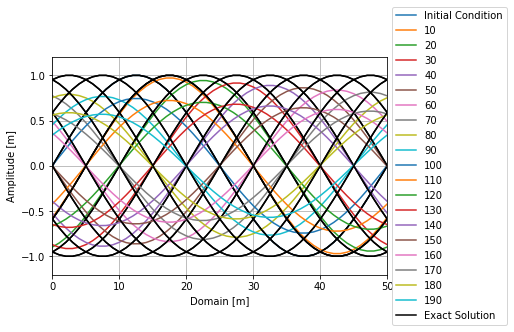

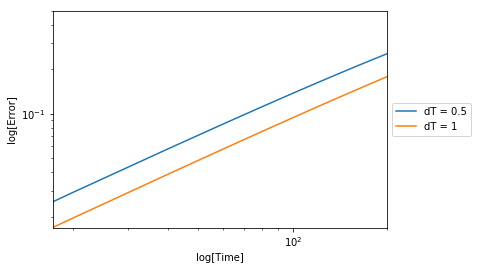

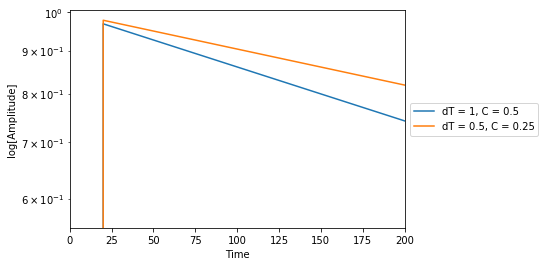

In [173]:
#2 Experiemnet

from numpy import math
import numpy as np

#DON'T COMPUTE CONDITIONS AT THE LAST TIMESTEP????


get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import math
np.core
#DECLARING CONSTANTS:

#*****************************************#
#Declare variables:

#CONSTANTS:

Ttot = 200.0
TStepSize = 0.5
Nt = int(Ttot/TStepSize) #total number of time steps (need to add 1?) 100

TStartingStep = 0 #Starting Time Step 
 


Xtot = 50 #total distance
XStepSize = 1 
Nx = int(Xtot/XStepSize + 1)  #total number of grid sizes = 51

XStartingStep = 0 #Starting Grid Step

#!!! 51 grid points in 50m

C = 0.5 #initial velocity 
A = 1.0 #initial amplitude

Wavelength_int = 50.0 #QUESTION: WAVELENGTH UNCHANGED OVERALL????

pi = float(3.141592654)

CourantNum = C*TStepSize/XStepSize




#**************************************#
#Exact Solution:
def exactSolution(x,t):
    return (A*math.sin(2*pi*(x- C * t )/Wavelength_int))


#For Square Wave Problem
def sign (x):
    if (x < 0):
        return -1
    elif (x == 0):
        return 0
    elif (x > 0):
        return 1



#**************************************#
#variable array: 

u_old = np.zeros([Nx])
u_new = np.zeros([Nx])
u_exact = np.zeros([Nx])
#**************************************#
#initial conditions

#exact solution & numerical are the same!!!

for j in range(0,Nx):
    u_old[j] = (A*math.sin(2*pi*(XStepSize*j)/Wavelength_int))
    
for j in range(0,Nx):
    u_exact[j] = (A*math.sin(2*pi*(XStepSize*j)/Wavelength_int))

#**************************************#
#Saving arrays: 



timeInterval = 20.0  #Time Interval Between saving = 10

u_OneTimeStep = np.zeros([int(Nt/timeInterval)  ,Nx],dtype=float)
u_exact_solution = np.zeros([int(Nt/timeInterval)  ,Nx], dtype=float)




u_Time_Final = np.zeros([Nt],dtype=float) #storing max amplitude at each time step 


errorList= []
timeList = []
ampList = []

#**************************************#
counter = 0
#putting initial conditions in the saving array:
u_OneTimeStep[0] = u_old
u_exact_solution[0] = u_exact

errorList += [0]
timeList += [0]
ampList += [0]
#*************************************#
#grid point array

grid = []
for i in range(0,Nx):
    grid+= [XStepSize*i]


#**************************************#


#main loop 


counter = 1


            #range --> first number inclusive, last number exclusive!!!

for k in range(1,Nt): #time loop
    CurrentTime = k*TStepSize
    
    for i in range(1, Nx-1): #grid loop
        u_new[i] = u_old[i] - CourantNum*(u_old[i] -u_old[i-1])
        
        
    
        
        
    #implement boundary conditions:
        
   
    u_new[Nx-1] = u_old[Nx-1] - CourantNum*(u_old[Nx-1] - u_old[Nx-2])
    u_new[0] = u_new[Nx-1] #ORDER IMPORTANT #????????????# 
    
        
        
    #shifting:
        
    u_old = np.copy(u_new)
        
    #calculate exact solution:
    for a in range(0,Nx):
        u_exact[a] = exactSolution( a*XStepSize, CurrentTime)
        
    #calculate error:
    error = max(abs(u_exact[0:Nx]-u_old[0:Nx]))
    #print(u_old,[CurrentTime])
    
    #calculate amplitude:
    amp = max(abs(u_old[0:Nx]))
    
    if (k)%timeInterval == 0:
        u_OneTimeStep[counter] = u_old
        u_exact_solution[counter] = u_exact
        errorList += [(error)]
        timeList += [(k)]
        ampList += [amp]
        counter+=1
        
#print((u_OneTimeStep))
#print(errorList)
#print(timeList)
#length of u_OneTimeStep = 10

#error plot
"""
plt.plot((timeList),(errorList))
plt.yscale('log')
plt.xscale('log')

"""



plt.figure(0)

#plt.plot(grid, u_OneTimeStep[0])

for i in range(0,len(u_OneTimeStep)):
    if i == 0:
        label = 'Initial Condition'
    else:
        label = (int(i*timeInterval*TStepSize))
        
        
        
    
    plt.plot(grid, u_OneTimeStep[i],label = label)
    plt.plot(grid, u_exact_solution[i], c = 'k')
plt.plot(grid, u_exact_solution[1], c = 'k',label = 'Exact Solution' )
#plt.plot(grid, u_exact_solution[0], c = 'k' )


"""   
plt.plot( timeList,ampList,)
plt.yscale('log')
plt.xscale('linear')
"""


    

#------
# These commands give the final adjustments to the figure
plt.grid()  # puts the grid in the figure
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5)) # place the legend in the right place
plt.xlabel('Domain [m]') # labels the x axis
plt.ylabel('Amplitude [m]') # labels the y axis
plt.xlim(0,50) # sets the limits of the x axis to show
plt.ylim(-1.2,1.2) # sets the limits of the y axis to show
#plt.savefig('#2,FullWaveform.', bbox_inches='tight') 

#get 2 pictures, one now, one with exact solution & 2nd generation waves



#***************************************#
#error-time 
plt.figure(1)
plt.plot((timeList),(errorList), label = 'dT = 0.5')
plt.plot((timeList),(ERROR1), label = 'dT = 1')
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
plt.yscale('log')
plt.xscale('log')
plt.xlabel('log[Time]')
plt.ylabel('log[Error]')

plt.xlim(0,200) 
plt.savefig('#2,Error-Time.pdf', bbox_inches='tight') 


#****************************************#
plt.figure(2)
plt.plot((timeList),(ampList),label = 'dT = 1, C = 0.5')
plt.plot((timeList), (AMP1), label = 'dT = 0.5, C = 0.25')
plt.yscale('log')
plt.xscale('linear')
plt.xlabel('Time')
plt.ylabel('log[Amplitude]')
plt.xlim(0,200)
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
plt.savefig('#2,Amplitude-Time.pdf', bbox_inches='tight') 

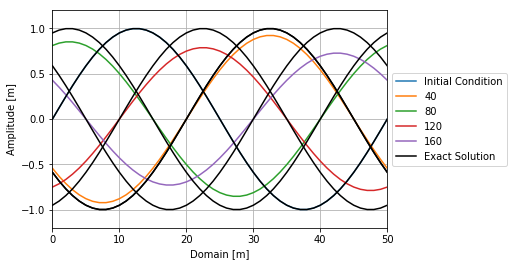

In [140]:
#2




from numpy import math
import numpy as np

#DON'T COMPUTE CONDITIONS AT THE LAST TIMESTEP????


get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import math
np.core
#DECLARING CONSTANTS:

#*****************************************#
#Declare variables:

#CONSTANTS:

Ttot = 200.0
TStepSize = 1
Nt = int(Ttot/TStepSize) #total number of time steps (need to add 1?) 100

TStartingStep = 0 #Starting Time Step 
 


Xtot = 50 #total distance
XStepSize = 1 
Nx = int(Xtot/XStepSize + 1)  #total number of grid sizes = 51

XStartingStep = 0 #Starting Grid Step

#!!! 51 grid points in 50m

C = 0.5 #initial velocity 
A = 1.0 #initial amplitude

Wavelength_int = 50.0 #QUESTION: WAVELENGTH UNCHANGED OVERALL????

pi = float(3.141592654)

CourantNum = C*TStepSize/XStepSize




#**************************************#
#Exact Solution:
def exactSolution(x,t):
    return (A*math.sin(2*pi*(x- C * t )/Wavelength_int))


#For Square Wave Problem
def sign (x):
    if (x < 0):
        return -1
    elif (x == 0):
        return 0
    elif (x > 0):
        return 1



#**************************************#
#variable array: 

u_old = np.zeros([Nx])
u_new = np.zeros([Nx])
u_exact = np.zeros([Nx])
#**************************************#
#initial conditions

#exact solution & numerical are the same!!!

for j in range(0,Nx):
    u_old[j] = (A*math.sin(2*pi*(XStepSize*j)/Wavelength_int))
    
for j in range(0,Nx):
    u_exact[j] = (A*math.sin(2*pi*(XStepSize*j)/Wavelength_int))

#**************************************#
#Saving arrays: 


#INTERVAL BETWEEN TIMESTEPS
timeInterval = 40.0  #Time Interval Between saving = 10

u_OneTimeStep = np.zeros([int(Nt/timeInterval)  ,Nx],dtype=float)
u_exact_solution = np.zeros([int(Nt/timeInterval)  ,Nx], dtype=float)




u_Time_Final = np.zeros([Nt],dtype=float) #storing max amplitude at each time step 


errorList= []
timeList = []
ampList = []

#**************************************#
counter = 0
#putting initial conditions in the saving array:
u_OneTimeStep[0] = u_old
u_exact_solution[0] = u_exact

errorList += [0]
timeList += [0]
ampList += [0]
#*************************************#
#grid point array

grid = []
for i in range(0,Nx):
    grid+= [XStepSize*i]


#**************************************#


#main loop 


counter = 1


            #range --> first number inclusive, last number exclusive!!!

for k in range(1,Nt): #time loop
    CurrentTime = k*TStepSize
    
    for i in range(1, Nx-1): #grid loop
        u_new[i] = u_old[i] - CourantNum*(u_old[i] -u_old[i-1])
        
        
    
        
        
    #implement boundary conditions:
        
   
    u_new[Nx-1] = u_old[Nx-1] - CourantNum*(u_old[Nx-1] - u_old[Nx-2])
    u_new[0] = u_new[Nx-1]
    
        
        
    #shifting:
        
    u_old = np.copy(u_new)
        
    #calculate exact solution:
    for a in range(0,Nx):
        u_exact[a] = exactSolution( a*XStepSize, CurrentTime)
        
    #calculate error:
    error = max(abs(u_exact[0:Nx]-u_old[0:Nx]))
    #print(u_old,[CurrentTime])
    
    #calculate amplitude:
    amp = max(abs(u_old[0:Nx]))
    
    if (k)%timeInterval == 0:
        u_OneTimeStep[counter] = u_old
        u_exact_solution[counter] = u_exact
        errorList += [(error)]
        timeList += [(k)]
        ampList += [amp]
        counter+=1
        
#print((u_OneTimeStep))
#print(errorList)
#print(timeList)
#length of u_OneTimeStep = 10

#error plot
"""
plt.plot((timeList),(errorList))
plt.yscale('log')
plt.xscale('log')

"""





#plt.plot(grid, u_OneTimeStep[0])

for i in range(0,len(u_OneTimeStep)):
    if i == 0:
        label = 'Initial Condition'
    else:
        label = (int(i*timeInterval))    
       
    plt.plot(grid, u_OneTimeStep[i],label = label)

for i in range(0, len(u_exact_solution)): 
    plt.plot(grid,u_exact_solution[i], c = 'k')

plt.plot(grid,u_exact_solution[1], label = 'Exact Solution', c = 'k')    
#plt.plot(grid, u_exact_solution[0], c = 'k' )


"""
for i in range(0,len(u_exact_solution)):
    plt.plot(grid, u_exact_solution[i] , c= 'k')
"""
"""   
plt.plot( timeList,ampList,)
plt.yscale('log')
plt.xscale('linear')
"""


    

#------
# These commands give the final adjustments to the figure
plt.grid()  # puts the grid in the figure
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5)) # place the legend in the right place
plt.xlabel('Domain [m]') # labels the x axis
plt.ylabel('Amplitude [m]') # labels the y axis
plt.xlim(0,50) # sets the limits of the x axis to show
plt.ylim(-1.2,1.2) # sets the limits of the y axis to show
plt.savefig('#2,waveformimportant.pdf', bbox_inches='tight')




(10, 35)

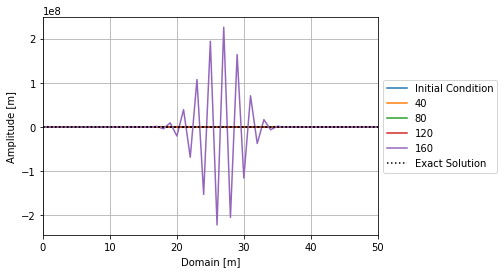

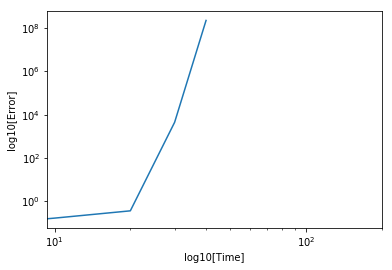

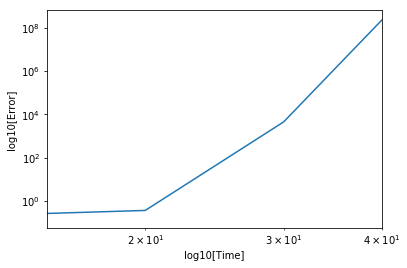

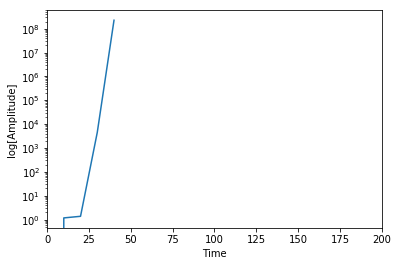

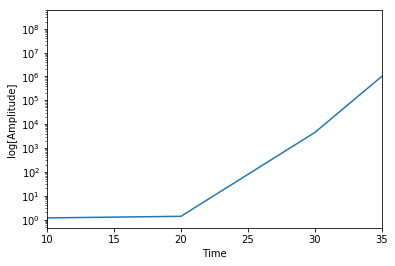

In [152]:
#3 Experiemnet

from numpy import math
import numpy as np

#DON'T COMPUTE CONDITIONS AT THE LAST TIMESTEP????


get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import math
np.core
#DECLARING CONSTANTS:

#*****************************************#
#Declare variables:

#CONSTANTS:

Ttot = 200.0
TStepSize = 4
Nt = int(Ttot/TStepSize) #total number of time steps (need to add 1?) 100

TStartingStep = 0 #Starting Time Step 
 


Xtot = 50 #total distance
XStepSize = 1 
Nx = int(Xtot/XStepSize + 1)  #total number of grid sizes = 51

XStartingStep = 0 #Starting Grid Step

#!!! 51 grid points in 50m

C = 0.5 #initial velocity 
A = 1.0 #initial amplitude

Wavelength_int = 50.0 #QUESTION: WAVELENGTH UNCHANGED OVERALL????

pi = float(3.141592654)

CourantNum = C*TStepSize/XStepSize




#**************************************#
#Exact Solution:
def exactSolution(x,t):
    return (A*math.sin(2*pi*(x- C * t )/Wavelength_int))


#For Square Wave Problem
def sign (x):
    if (x < 0):
        return -1
    elif (x == 0):
        return 0
    elif (x > 0):
        return 1



#**************************************#
#variable array: 

u_old = np.zeros([Nx])
u_new = np.zeros([Nx])
u_exact = np.zeros([Nx])
#**************************************#
#initial conditions

#exact solution & numerical are the same!!!

for j in range(0,Nx):
    u_old[j] = (A*math.sin(2*pi*(XStepSize*j)/Wavelength_int))
    
for j in range(0,Nx):
    u_exact[j] = (A*math.sin(2*pi*(XStepSize*j)/Wavelength_int))

#**************************************#
#Saving arrays: 

ERROR4 = []
AMP4 = []



timeInterval = 10.0  

u_OneTimeStep = np.zeros([int(Nt/timeInterval)  ,Nx],dtype=float)
u_exact_solution = np.zeros([int(Nt/timeInterval)  ,Nx], dtype=float)




u_Time_Final = np.zeros([Nt],dtype=float) #storing max amplitude at each time step 


errorList= []
timeList = []
ampList = []

#**************************************#
counter = 0
#putting initial conditions in the saving array:
u_OneTimeStep[0] = u_old
u_exact_solution[0] = u_exact

errorList += [0]
timeList += [0]
ampList += [0]
#*************************************#
#grid point array

grid = []
for i in range(0,Nx):
    grid+= [XStepSize*i]


#**************************************#


#main loop 


counter = 1


            #range --> first number inclusive, last number exclusive!!!

for k in range(1,Nt): #time loop
    CurrentTime = k*TStepSize
    
    for i in range(1, Nx-1): #grid loop
        u_new[i] = u_old[i] - CourantNum*(u_old[i] -u_old[i-1])
        
        
    
        
        
    #implement boundary conditions:
        
   
    u_new[Nx-1] = u_old[Nx-1] - CourantNum*(u_old[Nx-1] - u_old[Nx-2])
    u_new[0] = u_new[Nx-1] #ORDER IMPORTANT #????????????# 
    
        
        
    #shifting:
        
    u_old = np.copy(u_new)
        
    #calculate exact solution:
    for a in range(0,Nx):
        u_exact[a] = exactSolution( a*XStepSize, CurrentTime)
        
    #calculate error:
    error = max(abs(u_exact[0:Nx]-u_old[0:Nx]))
    #print(u_old,[CurrentTime])
    
    #calculate amplitude:
    amp = max(abs(u_old[0:Nx]))
    
    if (k)%timeInterval == 0:
        u_OneTimeStep[counter] = u_old
        u_exact_solution[counter] = u_exact
        errorList += [(error)]
        timeList += [(k)]
        ampList += [amp]
        counter+=1
        
#print((u_OneTimeStep))
#print(errorList)
#print(timeList)
#length of u_OneTimeStep = 10

#error plot
"""
plt.plot((timeList),(errorList))
plt.yscale('log')
plt.xscale('log')

"""

plt.figure(0)

#plt.plot(grid, u_OneTimeStep[0])

#for i in range(0,len(u_OneTimeStep)):

for i in range(0,len(u_OneTimeStep)):
    if i == 0:
        label = 'Initial Condition'
    else:
        label = (int(i*timeInterval*TStepSize))
        
       
        
    
    plt.plot(grid, u_OneTimeStep[i],label = label)
    plt.plot(grid, u_exact_solution[i],':', c = 'k')
plt.plot(grid, u_exact_solution[1],':', c = 'k',label = 'Exact Solution' )
#plt.plot(grid, u_exact_solution[0], c = 'k' )


"""   
plt.plot( timeList,ampList,)
plt.yscale('log')
plt.xscale('linear')
"""


    

#------
# These commands give the final adjustments to the figure
plt.grid()  # puts the grid in the figure
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5)) # place the legend in the right place
plt.xlabel('Domain [m]') # labels the x axis
plt.ylabel('Amplitude [m]') # labels the y axis
plt.xlim(0,50) # sets the limits of the x axis to show
#plt.ylim(-1.2,1.2) # sets the limits of the y axis to show
plt.savefig('#2,FullWaveform, BlowsUp.pdf', bbox_inches='tight') 

#get 2 pictures, one now, one with exact solution & 2nd generation waves



#***************************************#
#error-time 
plt.figure(1)
plt.plot((timeList),(errorList))
plt.yscale('log')
plt.xscale('log')
plt.xlabel('log10[Time]')
plt.ylabel('log10[Error]')

plt.xlim(0,200) 
#plt.savefig('#2,Error-Time.svg', bbox_inches='tight') 


#error-time 
plt.figure(2)
plt.plot((timeList),(errorList))
plt.yscale('log')
plt.xscale('log')
plt.xlabel('log10[Time]')
plt.ylabel('log10[Error]')
ERROR4 = errorList
plt.xlim(15,40) 
#plt.savefig('#2,Error-Time.svg', bbox_inches='tight') 

#****************************************#
#amplitude-time
plt.figure(3)
plt.plot((timeList),(ampList))
plt.yscale('log')
plt.xscale('linear')
plt.xlabel('Time')
plt.ylabel('log[Amplitude]')
plt.xlim(0,200)
AMP4 = ampList
#plt.savefig('#2,Amplitude-Time.svg', bbox_inches='tight') 
#amplitude-time2


plt.figure(4)
plt.plot((timeList),(ampList))
plt.yscale('log')
plt.xscale('linear')
plt.xlabel('Time')
plt.ylabel('log[Amplitude]')
plt.xlim(10,35)

#plt.savefig('#2,Amplitude-Time.svg', bbox_inches='tight') 

"\nplt.figure(4)\nplt.plot((timeList),(ampList))\nplt.yscale('log')\nplt.xscale('linear')\nplt.xlabel('Time')\nplt.ylabel('log[Amplitude]')\nplt.xlim(0,15)\n"

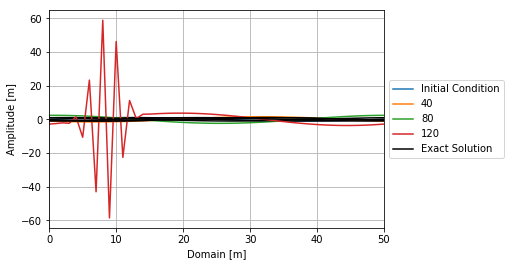

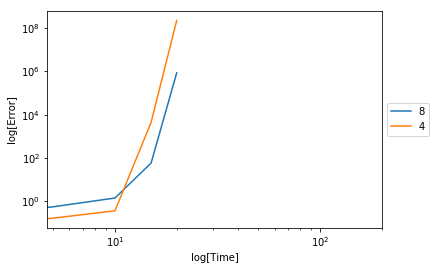

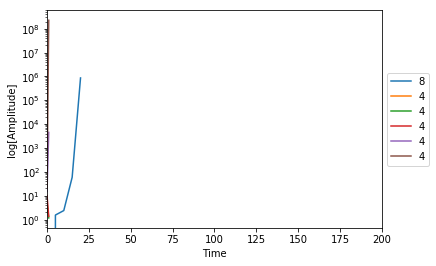

In [150]:
#2 Experiemnet

from numpy import math
import numpy as np

#DON'T COMPUTE CONDITIONS AT THE LAST TIMESTEP????


get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import math
np.core
#DECLARING CONSTANTS:

#*****************************************#
#Declare variables:

#CONSTANTS:

Ttot = 200.0
TStepSize = 8
Nt = int(Ttot/TStepSize) #total number of time steps (need to add 1?) 100

TStartingStep = 0 #Starting Time Step 
 


Xtot = 50 #total distance
XStepSize = 1 
Nx = int(Xtot/XStepSize + 1)  #total number of grid sizes = 51

XStartingStep = 0 #Starting Grid Step

#!!! 51 grid points in 50m

C = 0.5 #initial velocity 
A = 1.0 #initial amplitude

Wavelength_int = 50.0 #QUESTION: WAVELENGTH UNCHANGED OVERALL????

pi = float(3.141592654)

CourantNum = C*TStepSize/XStepSize




#**************************************#
#Exact Solution:
def exactSolution(x,t):
    return (A*math.sin(2*pi*(x- C * t )/Wavelength_int))


#For Square Wave Problem
def sign (x):
    if (x < 0):
        return -1
    elif (x == 0):
        return 0
    elif (x > 0):
        return 1



#**************************************#
#variable array: 

u_old = np.zeros([Nx])
u_new = np.zeros([Nx])
u_exact = np.zeros([Nx])
#**************************************#
#initial conditions

#exact solution & numerical are the same!!!

for j in range(0,Nx):
    u_old[j] = (A*math.sin(2*pi*(XStepSize*j)/Wavelength_int))
    
for j in range(0,Nx):
    u_exact[j] = (A*math.sin(2*pi*(XStepSize*j)/Wavelength_int))

#**************************************#
#Saving arrays: 



timeInterval = 5.0  #Time Interval Between saving = 10

u_OneTimeStep = np.zeros([int(Nt/timeInterval)  ,Nx],dtype=float)
u_exact_solution = np.zeros([int(Nt/timeInterval)  ,Nx], dtype=float)




u_Time_Final = np.zeros([Nt],dtype=float) #storing max amplitude at each time step 


errorList= []
timeList = []
ampList = []

#**************************************#
counter = 0
#putting initial conditions in the saving array:
u_OneTimeStep[0] = u_old
u_exact_solution[0] = u_exact

errorList += [0]
timeList += [0]
ampList += [0]
#*************************************#
#grid point array

grid = []
for i in range(0,Nx):
    grid+= [XStepSize*i]


#**************************************#


#main loop 


counter = 1


            #range --> first number inclusive, last number exclusive!!!

for k in range(1,Nt): #time loop
    CurrentTime = k*TStepSize
    
    for i in range(1, Nx-1): #grid loop
        u_new[i] = u_old[i] - CourantNum*(u_old[i] -u_old[i-1])
        
        
    
        
        
    #implement boundary conditions:
        
   
    u_new[Nx-1] = u_old[Nx-1] - CourantNum*(u_old[Nx-1] - u_old[Nx-2])
    u_new[0] = u_new[Nx-1] #ORDER IMPORTANT #????????????# 
    
        
        
    #shifting:
        
    u_old = np.copy(u_new)
        
    #calculate exact solution:
    for a in range(0,Nx):
        u_exact[a] = exactSolution( a*XStepSize, CurrentTime)
        
    #calculate error:
    error = max(abs(u_exact[0:Nx]-u_old[0:Nx]))
    #print(u_old,[CurrentTime])
    
    #calculate amplitude:
    amp = max(abs(u_old[0:Nx]))
    
    if (k)%timeInterval == 0:
        u_OneTimeStep[counter] = u_old
        u_exact_solution[counter] = u_exact
        errorList += [(error)]
        timeList += [(k)]
        ampList += [amp]
        counter+=1
        
#print((u_OneTimeStep))
#print(errorList)
#print(timeList)
#length of u_OneTimeStep = 10

#error plot
"""
plt.plot((timeList),(errorList))
plt.yscale('log')
plt.xscale('log')

"""



plt.figure(0)

#plt.plot(grid, u_OneTimeStep[0])

for i in range(0,4):
    if i == 0:
        label = 'Initial Condition'
    else:
        label = (int(i*timeInterval*TStepSize))
        
        
        
    
    plt.plot(grid, u_OneTimeStep[i],label = label)
    plt.plot(grid, u_exact_solution[i], c = 'k')
plt.plot(grid, u_exact_solution[1], c = 'k',label = 'Exact Solution' )
#plt.plot(grid, u_exact_solution[0], c = 'k' )


"""   
plt.plot( timeList,ampList,)
plt.yscale('log')
plt.xscale('linear')
"""


    

#------
# These commands give the final adjustments to the figure
plt.grid()  # puts the grid in the figure
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5)) # place the legend in the right place
plt.xlabel('Domain [m]') # labels the x axis
plt.ylabel('Amplitude [m]') # labels the y axis
plt.xlim(0,50) # sets the limits of the x axis to show
#plt.ylim(-1.2,1.2) # sets the limits of the y axis to show
plt.savefig('#2,FullWaveform.svg', bbox_inches='tight') 

#get 2 pictures, one now, one with exact solution & 2nd generation waves



#***************************************#
#error-time 
plt.figure(1)
plt.plot((timeList),(errorList), label = '8')
plt.plot((timeList),(ERROR4), label = '4')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('log[Time]')
plt.ylabel('log[Error]')

plt.xlim(0,200) 

plt.legend(loc='center left',bbox_to_anchor=(1, 0.5)) 
plt.savefig('findmeeeee.pdf', bbox_inches='tight') 
#plt.savefig('#2,Error-Time.svg', bbox_inches='tight') 



#****************************************#
#amplitude-time
plt.figure(3)
plt.plot((timeList),(ampList), label = '8')
plt.plot((timeList, AMP4), label = '4')
plt.yscale('log')
plt.xscale('linear')
plt.xlabel('Time')
plt.ylabel('log[Amplitude]')
plt.xlim(0,200)
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5)) 
plt.savefig('findmeowww.pdf', bbox_inches='tight') 


#plt.savefig('#2,Amplitude-Time.svg', bbox_inches='tight') 
#amplitude-time2

"""
plt.figure(4)
plt.plot((timeList),(ampList))
plt.yscale('log')
plt.xscale('linear')
plt.xlabel('Time')
plt.ylabel('log[Amplitude]')
plt.xlim(0,15)
"""
#plt.savefig('#2,Amplitude-Time.svg', bbox_inches='tight') 

"   \nplt.plot( timeList,ampList,)\nplt.yscale('log')\nplt.xscale('linear')\n"

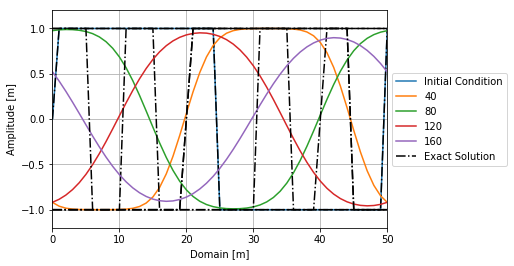

In [122]:

from numpy import math
import numpy as np

#DON'T COMPUTE CONDITIONS AT THE LAST TIMESTEP????


get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import math
np.core
#DECLARING CONSTANTS:

#*****************************************#
#Declare variables:

#CONSTANTS:

Ttot = 200.0
TStepSize = 1.0
Nt = int(Ttot/TStepSize) #total number of time steps (need to add 1?) 100

TStartingStep = 0 #Starting Time Step 
 


Xtot = 50 #total distance
XStepSize = 1 
Nx = int(Xtot/XStepSize + 1)  #total number of grid sizes = 51

XStartingStep = 0 #Starting Grid Step

#!!! 51 grid points in 50m

C = 0.5 #initial velocity 
A = 1.0 #initial amplitude

Wavelength_int = 50.0 #QUESTION: WAVELENGTH UNCHANGED OVERALL????

pi = float(3.141592654)

CourantNum = C*TStepSize/XStepSize




#**************************************#
#Exact Solution:
def exactSolution(x,t):
    return (A*math.sin(2*pi*(x- C * t )/Wavelength_int))


#For Square Wave Problem
def sign (x):
    if (x < 0):
        return -1
    elif (x == 0):
        return 0
    elif (x > 0):
        return 1



#**************************************#
#variable array: 

u_old = np.zeros([Nx])
u_new = np.zeros([Nx])
u_exact = np.zeros([Nx])
#**************************************#
#initial conditions

#exact solution & numerical are the same!!!

for j in range(0,Nx):
    u_old[j] = sign(A*math.sin(2*pi*(XStepSize*j)/Wavelength_int))
    
for j in range(0,Nx):
    u_exact[j] = sign(A*math.sin(2*pi*(XStepSize*j)/Wavelength_int))

#**************************************#
#Saving arrays: 



timeInterval = 40.0  #Time Interval Between saving = 10

u_OneTimeStep = np.zeros([int(Nt/timeInterval)  ,Nx],dtype=float)
u_exact_solution = np.zeros([int(Nt/timeInterval)  ,Nx], dtype=float)




u_Time_Final = np.zeros([Nt],dtype=float) #storing max amplitude at each time step 


errorList= []
timeList = []
ampList = []

#**************************************#
counter = 0
#putting initial conditions in the saving array:
u_OneTimeStep[0] = u_old
u_exact_solution[0] = u_exact

errorList += [0]
timeList += [0]
ampList += [0]
#*************************************#
#grid point array

grid = []
for i in range(0,Nx):
    grid+= [XStepSize*i]


#**************************************#


#main loop 


counter = 1


            #range --> first number inclusive, last number exclusive!!!

for k in range(1,Nt): #time loop
    CurrentTime = k*TStepSize
    
    for i in range(1, Nx-1): #grid loop
        u_new[i] = u_old[i] - CourantNum*(u_old[i] -u_old[i-1])
       
    #implement boundary conditions:
        
   
    u_new[Nx-1] = u_old[Nx-1] - CourantNum*(u_old[Nx-1] - u_old[Nx-2])
    u_new[0] = u_new[Nx-1] 
    
        
        
    #shifting:
        
    u_old = np.copy(u_new)
        
    #calculate exact solution:
    for a in range(0,Nx):
        u_exact[a] = sign(exactSolution( a*XStepSize, CurrentTime))
        
    #calculate error:
    error = max(abs(u_exact[0:Nx]-u_old[0:Nx]))
    #print(u_old,[CurrentTime])
    
    #calculate amplitude:
    amp = max(abs(u_old[0:Nx]))
    
    if (k)%timeInterval == 0:
        u_OneTimeStep[counter] = u_old
        u_exact_solution[counter] = u_exact
        errorList += [(error)]
        timeList += [(k)]
        ampList += [amp]
        counter+=1
        
#print((u_OneTimeStep))
#print(errorList)
#print(timeList)
#length of u_OneTimeStep = 10

#error plot
"""
plt.plot((timeList),(errorList))
plt.yscale('log')
plt.xscale('log')

"""





#plt.plot(grid, u_OneTimeStep[0])


plt.figure(0)

#plt.plot(grid, u_OneTimeStep[0])

for i in range(0,len(u_OneTimeStep)):
    if i == 0:
        label = 'Initial Condition'
    else:
        label = (int(i*timeInterval*TStepSize))
        
        
        
    
    plt.plot(grid, u_OneTimeStep[i],label = label)
    plt.plot(grid, u_exact_solution[i],'-.k', c = 'k')
plt.plot(grid, u_exact_solution[1],'-.k', c = 'k',label = 'Exact Solution' )
#plt.plot(grid, u_exact_solution[0], c = 'k' )


"""   
plt.plot( timeList,ampList,)
plt.yscale('log')
plt.xscale('linear')
"""


    

#------
# These commands give the final adjustments to the figure
plt.grid()  # puts the grid in the figure
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5)) # place the legend in the right place
plt.xlabel('Domain [m]') # labels the x axis
plt.ylabel('Amplitude [m]') # labels the y axis
plt.xlim(0,50) # sets the limits of the x axis to show
plt.ylim(-1.2,1.2) # sets the limits of the y axis to show


    
#plt.plot(grid, u_exact_solution[0], c = 'k' )


"""
for i in range(0,len(u_exact_solution)):
    plt.plot(grid, u_exact_solution[i] , c= 'k')
"""
"""   
plt.plot( timeList,ampList,)
plt.yscale('log')
plt.xscale('linear')
"""


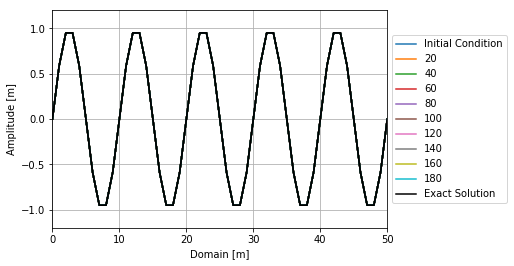

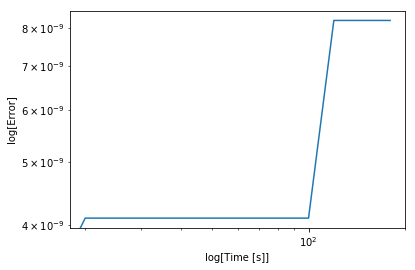

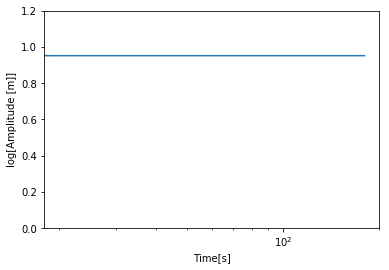

In [158]:
#3 Experiment #dt = 1

from numpy import math
import numpy as np

#DON'T COMPUTE CONDITIONS AT THE LAST TIMESTEP????


get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import math
np.core
#DECLARING CONSTANTS:

#*****************************************#
#Declare variables:

#CONSTANTS:

Ttot = 200.0
TStepSize = 2.0
Nt = int(Ttot/TStepSize) #total number of time steps (need to add 1?) 100

TStartingStep = 0 #Starting Time Step 
 


Xtot = 50 #total distance
XStepSize = 1 
Nx = int(Xtot/XStepSize + 1)  #total number of grid sizes = 51

XStartingStep = 0 #Starting Grid Step

#!!! 51 grid points in 50m

C = 0.5 #initial velocity 
A = 1.0 #initial amplitude

Wavelength_int = 10.0 

pi = float(3.141592654)

CourantNum = C*TStepSize/XStepSize




#**************************************#
#Exact Solution:
def exactSolution(x,t):
    return (A*math.sin(2*pi*(x- C * t )/Wavelength_int))


#For Square Wave Problem
def sign (x):
    if (x < 0):
        return -1
    elif (x == 0):
        return 0
    elif (x > 0):
        return 1



#**************************************#
#variable array: 

u_old = np.zeros([Nx])
u_new = np.zeros([Nx])
u_exact = np.zeros([Nx])
#**************************************#
#initial conditions

#exact solution & numerical are the same!!!

for j in range(0,Nx):
    u_old[j] = (A*math.sin(2*pi*(XStepSize*j)/Wavelength_int))
    
for j in range(0,Nx):
    u_exact[j] = (A*math.sin(2*pi*(XStepSize*j)/Wavelength_int))

#**************************************#
#Saving arrays: 



timeInterval = 10  #Time Interval Between saving = 10

u_OneTimeStep = np.zeros([int(Nt/timeInterval)  ,Nx],dtype=float)
u_exact_solution = np.zeros([int(Nt/timeInterval)  ,Nx], dtype=float)




u_Time_Final = np.zeros([Nt],dtype=float) #storing max amplitude at each time step 


errorList= []
timeList = []
ampList = []

#**************************************#
counter = 0
#putting initial conditions in the saving array:
u_OneTimeStep[0] = u_old
u_exact_solution[0] = u_exact

errorList += [0]
timeList += [0]
ampList += [0]
#*************************************#
#grid point array

grid = []
for i in range(0,Nx):
    grid+= [XStepSize*i]


#**************************************#


#main loop 


counter = 1


            #range --> first number inclusive, last number exclusive!!!

for k in range(1,Nt): #time loop
    CurrentTime = k*TStepSize
    
    for i in range(1, Nx-1): #grid loop
        u_new[i] = u_old[i] - CourantNum*(u_old[i] -u_old[i-1])
        
        
    
        
        
    #implement boundary conditions:
        
   
    u_new[Nx-1] = u_old[Nx-1] - CourantNum*(u_old[Nx-1] - u_old[Nx-2])
    u_new[0] = u_new[Nx-1] #ORDER IMPORTANT #????????????# 
    
        
        
    #shifting:
        
    u_old = np.copy(u_new)
        
    #calculate exact solution:
    for a in range(0,Nx):
        u_exact[a] = exactSolution( a*XStepSize, CurrentTime)
        
    #calculate error:
    error = max(abs(u_exact[0:Nx]-u_old[0:Nx]))
    #print(u_old,[CurrentTime])
    
    #calculate amplitude:
    amp = max(abs(u_old[0:Nx]))
    
    if (k)%timeInterval == 0:
        u_OneTimeStep[counter] = u_old
        u_exact_solution[counter] = u_exact
        errorList += [((error))]
        timeList += [((CurrentTime))]
        ampList += [amp]
        counter+=1
        
#print((u_OneTimeStep))
#print(errorList)
#print(timeList)
#length of u_OneTimeStep = 10

#error plot
"""
plt.plot((timeList),(errorList))
plt.yscale('log')
plt.xscale('log')

"""



plt.figure(0)

#plt.plot(grid, u_OneTimeStep[0])

for i in range(0,len(u_OneTimeStep)):
    if i == 0:
        label = 'Initial Condition'
    else:
        label = (int(i*timeInterval*TStepSize))
        
        
        
    
    plt.plot(grid, u_OneTimeStep[i],label = label)
    plt.plot(grid, u_exact_solution[i], c = 'k')
plt.plot(grid, u_exact_solution[1], c = 'k',label = 'Exact Solution' )
#plt.plot(grid, u_exact_solution[0], c = 'k' )


"""   
plt.plot( timeList,ampList,)
plt.yscale('log')
plt.xscale('linear')
"""


    

#------
# These commands give the final adjustments to the figure
plt.grid()  # puts the grid in the figure
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5)) # place the legend in the right place
plt.xlabel('Domain [m]') # labels the x axis
plt.ylabel('Amplitude [m]') # labels the y axis
plt.xlim(0,50) # sets the limits of the x axis to show
plt.ylim(-1.2,1.2) # sets the limits of the y axis to show

plt.savefig('#1,Waveformhaha.svg', bbox_inches='tight') 

#Note that the bbox_extra_artists must be an iterable

#***************************************#
#error-time 
plt.figure(1)
plt.plot((timeList),(errorList))
plt.yscale('log')
plt.xscale('log')
plt.xlabel('log[Time [s]]')
plt.ylabel('log[Error]')
#plt.ylim(0,10**-9)
plt.xlim(0,200) 
plt.savefig('#1,Error-Time.svg', bbox_inches='tight') 


#****************************************#
plt.figure(2)
plt.plot((timeList),(ampList))
plt.yscale('linear')
plt.xscale('log')
plt.xlabel('Time[s]')
plt.ylabel('log[Amplitude [m]]')
plt.xlim(0,200)
plt.ylim(0,1.2)
plt.savefig('#1,Amplitude-Time.svg', bbox_inches='tight') 


#****************************************#




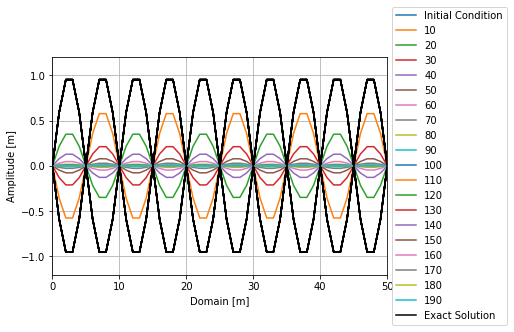

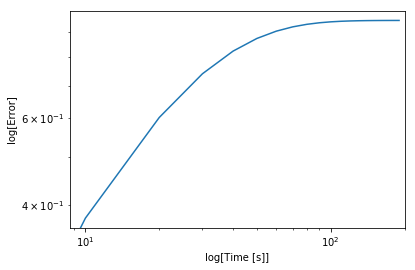

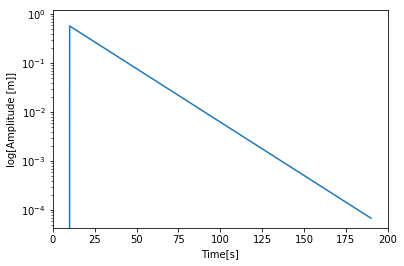

In [159]:
#3 Experiment #dt = 2

from numpy import math
import numpy as np

#DON'T COMPUTE CONDITIONS AT THE LAST TIMESTEP????


get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import math
np.core
#DECLARING CONSTANTS:

#*****************************************#
#Declare variables:

#CONSTANTS:

Ttot = 200.0
TStepSize = 1.0
Nt = int(Ttot/TStepSize) #total number of time steps (need to add 1?) 100

TStartingStep = 0 #Starting Time Step 
 


Xtot = 50 #total distance
XStepSize = 1 
Nx = int(Xtot/XStepSize + 1)  #total number of grid sizes = 51

XStartingStep = 0 #Starting Grid Step

#!!! 51 grid points in 50m

C = 0.5 #initial velocity 
A = 1.0 #initial amplitude

Wavelength_int = 10.0 

pi = float(3.141592654)

CourantNum = C*TStepSize/XStepSize




#**************************************#
#Exact Solution:
def exactSolution(x,t):
    return (A*math.sin(2*pi*(x- C * t )/Wavelength_int))


#For Square Wave Problem
def sign (x):
    if (x < 0):
        return -1
    elif (x == 0):
        return 0
    elif (x > 0):
        return 1



#**************************************#
#variable array: 

u_old = np.zeros([Nx])
u_new = np.zeros([Nx])
u_exact = np.zeros([Nx])
#**************************************#
#initial conditions

#exact solution & numerical are the same!!!

for j in range(0,Nx):
    u_old[j] = (A*math.sin(2*pi*(XStepSize*j)/Wavelength_int))
    
for j in range(0,Nx):
    u_exact[j] = (A*math.sin(2*pi*(XStepSize*j)/Wavelength_int))

#**************************************#
#Saving arrays: 



timeInterval = 10  #Time Interval Between saving = 10

u_OneTimeStep = np.zeros([int(Nt/timeInterval)  ,Nx],dtype=float)
u_exact_solution = np.zeros([int(Nt/timeInterval)  ,Nx], dtype=float)




u_Time_Final = np.zeros([Nt],dtype=float) #storing max amplitude at each time step 


errorList= []
timeList = []
ampList = []

#**************************************#
counter = 0
#putting initial conditions in the saving array:
u_OneTimeStep[0] = u_old
u_exact_solution[0] = u_exact

errorList += [0]
timeList += [0]
ampList += [0]
#*************************************#
#grid point array

grid = []
for i in range(0,Nx):
    grid+= [XStepSize*i]


#**************************************#


#main loop 


counter = 1


            #range --> first number inclusive, last number exclusive!!!

for k in range(1,Nt): #time loop
    CurrentTime = k*TStepSize
    
    for i in range(1, Nx-1): #grid loop
        u_new[i] = u_old[i] - CourantNum*(u_old[i] -u_old[i-1])
        
        
    
        
        
    #implement boundary conditions:
        
   
    u_new[Nx-1] = u_old[Nx-1] - CourantNum*(u_old[Nx-1] - u_old[Nx-2])
    u_new[0] = u_new[Nx-1] 
    
        
        
    #shifting:
        
    u_old = np.copy(u_new)
        
    #calculate exact solution:
    for a in range(0,Nx):
        u_exact[a] = exactSolution( a*XStepSize, CurrentTime)
        
    #calculate error:
    error = max(abs(u_exact[0:Nx]-u_old[0:Nx]))
    #print(u_old,[CurrentTime])
    
    #calculate amplitude:
    amp = max(abs(u_old[0:Nx]))
    
    if (k)%timeInterval == 0:
        u_OneTimeStep[counter] = u_old
        u_exact_solution[counter] = u_exact
        errorList += [((error))]
        timeList += [((CurrentTime))]
        ampList += [amp]
        counter+=1
        
#print((u_OneTimeStep))
#print(errorList)
#print(timeList)
#length of u_OneTimeStep = 10

#error plot
"""
plt.plot((timeList),(errorList))
plt.yscale('log')
plt.xscale('log')

"""



plt.figure(0)

#plt.plot(grid, u_OneTimeStep[0])

for i in range(0,len(u_OneTimeStep)):
    if i == 0:
        label = 'Initial Condition'
    else:
        label = (int(i*timeInterval*TStepSize))
        
        
        
    
    plt.plot(grid, u_OneTimeStep[i],label = label)
    plt.plot(grid, u_exact_solution[i], c = 'k')
plt.plot(grid, u_exact_solution[1], c = 'k',label = 'Exact Solution' )
#plt.plot(grid, u_exact_solution[0], c = 'k' )


"""   
plt.plot( timeList,ampList,)
plt.yscale('log')
plt.xscale('linear')
"""


    

#------
# These commands give the final adjustments to the figure
plt.grid()  # puts the grid in the figure
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5)) # place the legend in the right place
plt.xlabel('Domain [m]') # labels the x axis
plt.ylabel('Amplitude [m]') # labels the y axis
plt.xlim(0,50) # sets the limits of the x axis to show
plt.ylim(-1.2,1.2) # sets the limits of the y axis to show

plt.savefig('#4,Waveform.svg', bbox_inches='tight') 

#Note that the bbox_extra_artists must be an iterable

#***************************************#
#error-time 
plt.figure(1)
plt.plot((timeList),(errorList))
plt.yscale('log')
plt.xscale('log')
plt.xlabel('log[Time [s]]')
plt.ylabel('log[Error]')
#plt.ylim(0,10**-9)
plt.xlim(0,200) 
plt.savefig('#1,Error-Time.svg', bbox_inches='tight') 


#****************************************#


#amplitude-time
plt.figure(2)
plt.plot((timeList),(ampList))
plt.yscale('log')
plt.xscale('linear')
plt.xlabel('Time[s]')
plt.ylabel('log[Amplitude [m]]')
plt.xlim(0,200)
plt.ylim(0,1.2)
plt.savefig('#1,Amplitude-Time.svg', bbox_inches='tight') 

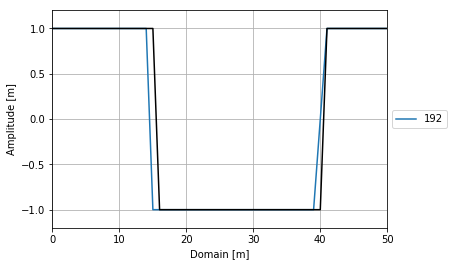

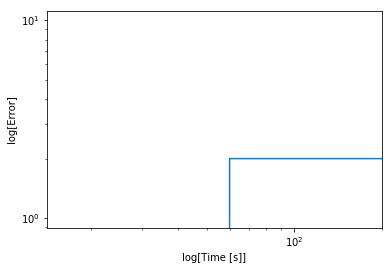

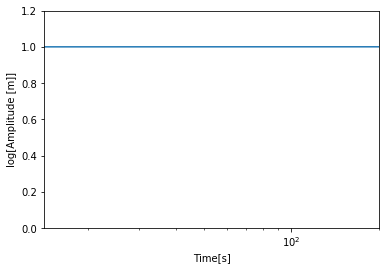

In [170]:
#square wave 


#1 Experiment

from numpy import math
import numpy as np

#DON'T COMPUTE CONDITIONS AT THE LAST TIMESTEP????


get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import math
np.core
#DECLARING CONSTANTS:

#*****************************************#
#Declare variables:

#CONSTANTS:

Ttot = 20000.0
TStepSize = 2.0
Nt = int(Ttot/TStepSize) #total number of time steps (need to add 1?) 100

TStartingStep = 0 #Starting Time Step 
 


Xtot = 50 #total distance
XStepSize = 1 
Nx = int(Xtot/XStepSize + 1)  #total number of grid sizes = 51

XStartingStep = 0 #Starting Grid Step

#!!! 51 grid points in 50m

C = 0.5 #initial velocity 
A = 1.0 #initial amplitude

Wavelength_int = 50.0 #QUESTION: WAVELENGTH UNCHANGED OVERALL????

pi = float(3.141592654)

CourantNum = C*TStepSize/XStepSize




#**************************************#
#Exact Solution:
def exactSolution(x,t):
    return (A*math.sin(2*pi*(x- C * t )/Wavelength_int))


#For Square Wave Problem
def sign (x):
    if (x < 0):
        return -1
    elif (x == 0):
        return 0
    elif (x > 0):
        return 1



#**************************************#
#variable array: 

u_old = np.zeros([Nx])
u_new = np.zeros([Nx])
u_exact = np.zeros([Nx])
#**************************************#
#initial conditions

#exact solution & numerical are the same!!!

for j in range(0,Nx):
    u_old[j] = (sign(A*math.sin(2*pi*(XStepSize*j)/Wavelength_int)))
    
for j in range(0,Nx):
    u_exact[j] = (sign(A*math.sin(2*pi*(XStepSize*j)/Wavelength_int)))

#**************************************#
#Saving arrays: 



timeInterval = 10.0  #Time Interval Between saving = 10

u_OneTimeStep = np.zeros([int(Nt/timeInterval)  ,Nx],dtype=float)
u_exact_solution = np.zeros([int(Nt/timeInterval)  ,Nx], dtype=float)




u_Time_Final = np.zeros([Nt],dtype=float) #storing max amplitude at each time step 


errorList= []
timeList = []
ampList = []

#**************************************#
counter = 0
#putting initial conditions in the saving array:
u_OneTimeStep[0] = u_old
u_exact_solution[0] = u_exact

errorList += [0]
timeList += [0]
ampList += [0]
#*************************************#
#grid point array

grid = []
for i in range(0,Nx):
    grid+= [XStepSize*i]


#**************************************#


#main loop 


counter = 1


            #range --> first number inclusive, last number exclusive!!!

for k in range(1,Nt): #time loop
    CurrentTime = k*TStepSize
    
    for i in range(1, Nx-1): #grid loop
        u_new[i] = u_old[i] - CourantNum*(u_old[i] -u_old[i-1])
        
        
    
        
        
    #implement boundary conditions:
        
   
    u_new[Nx-1] = u_old[Nx-1] - CourantNum*(u_old[Nx-1] - u_old[Nx-2])
    u_new[0] = u_new[Nx-1] #ORDER IMPORTANT #????????????# 
    
        
        
    #shifting:
        
    u_old = np.copy(u_new)
        
    #calculate exact solution:
    for a in range(0,Nx):
        u_exact[a] = sign(exactSolution( a*XStepSize, CurrentTime))
        
    #calculate error:
    error = max(abs(u_exact[0:Nx]-u_old[0:Nx]))
    #print(u_old,[CurrentTime])
    
    #calculate amplitude:
    amp = max(abs(u_old[0:Nx]))
    
    if (k)%timeInterval == 0:
        u_OneTimeStep[counter] = u_old
        u_exact_solution[counter] = u_exact
        errorList += [((error))]
        timeList += [((CurrentTime))]
        ampList += [amp]
        counter+=1
        
#print((u_OneTimeStep))
#print(errorList)
#print(timeList)
#length of u_OneTimeStep = 10

#error plot
"""
plt.plot((timeList),(errorList))
plt.yscale('log')
plt.xscale('log')

"""



plt.figure(0)
plt.plot(grid, u_OneTimeStep[-1],label = label)
plt.plot(grid, u_exact_solution[-1], c = 'k')



#------
# These commands give the final adjustments to the figure
plt.grid()  # puts the grid in the figure
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5)) # place the legend in the right place
plt.xlabel('Domain [m]') # labels the x axis
plt.ylabel('Amplitude [m]') # labels the y axis
plt.xlim(0,50) # sets the limits of the x axis to show
plt.ylim(-1.2,1.2) # sets the limits of the y axis to show

plt.savefig('#1,Waveform.svg', bbox_inches='tight') 

#----------

#plt.plot(grid, u_OneTimeStep[0])
"""
plt.figure(1)

for i in range(15,len(u_OneTimeStep)):
    if i == 0:
        label = 'Initial Condition'
    else:
        label = (int(i*timeInterval*TStepSize))
        


        
    
    plt.plot(grid, u_OneTimeStep[i],label = label)
    plt.plot(grid, u_exact_solution[i], c = 'k')
    
    

#plt.plot(grid, u_exact_solution[1], c = 'k',label = 'Exact Solution' )
#plt.plot(grid, u_exact_solution[0], c = 'k' )

"""
"""   
plt.plot( timeList,ampList,)
plt.yscale('log')
plt.xscale('linear')
"""


    
"""
#------
# These commands give the final adjustments to the figure
plt.grid()  # puts the grid in the figure
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5)) # place the legend in the right place
plt.xlabel('Domain [m]') # labels the x axis
plt.ylabel('Amplitude [m]') # labels the y axis
plt.xlim(0,50) # sets the limits of the x axis to show
plt.ylim(-1.2,1.2) # sets the limits of the y axis to show

plt.savefig('#1,Waveform.svg', bbox_inches='tight') 
"""
#Note that the bbox_extra_artists must be an iterable

#***************************************#
#error-time 
plt.figure(2)
plt.plot((timeList),(errorList))
plt.yscale('log')
plt.xscale('log')
plt.xlabel('log[Time [s]]')
plt.ylabel('log[Error]')
#plt.ylim(0,10**-9)
plt.xlim(0,200) 
plt.savefig('#1,Error-Time.pdf', bbox_inches='tight') 


#****************************************#
plt.figure(3)
plt.plot((timeList),(ampList))
plt.yscale('linear')
plt.xscale('log')
plt.xlabel('Time[s]')
plt.ylabel('log[Amplitude [m]]')
plt.xlim(0,200)
plt.ylim(0,1.2)
plt.savefig('#1,Amplitude-Time.pdf', bbox_inches='tight') 


